# 인공신경망 딥러닝 알고리즘 구현_케라스를 이용합니다_허진경
* Jupyter Notebook Info
>- Dayoung Yun
>- 2021/11/29

## 2장 케라스를 이용한 딥러닝 구현
### 케라스
#### 케라스모델
>- 케라스를 이용해서 딥러닝 모델을 만들기 위해서는 Sequential클래스를 이용한 방법과 Function API를 이용하는 방법이 있음
>- Function API방법은 잘 사용 안함

##### Sequential 클래스 이용
>- 직관적이고 편리
>- 단순히 층을 쌓는 것만으로는 모든 인공신경망을 구현할 수 없음
>- 복잡한 인공신경망 구현 불가

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(3, input_dim = 4, activation = 'softmax'))

##### 함수형 API이용
from tensorflow.keras.models import Model
from tensorflow.keras.layers import InputLayer, Dense

a = InputLayer(shape = (32,))
b = Dense(32)(a)
model = Model(inputs = a, outputs = b)

#### MNIST 데이터 분류 모델


In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [6]:
(train_X, train_y),(test_X, test_y) = mnist.load_data()
train_X, test_X = train_X / 255.0, test_X / 255.0

In [8]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(360, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

In [11]:
model.compile(optimizer = 'SGD', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.fit(train_X, train_y, batch_size = 100, epochs = 5)
model.evaluate(test_X, test_y)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 1.0954 - accuracy: 0.6959
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5049 - accuracy: 0.8532
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.4096 - accuracy: 0.8816
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3595 - accuracy: 0.8951
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.9289


[0.2524278461933136, 0.9289000034332275]

### 모델 저장하고 불러오기
>- 케라스테어 모델을 저장하는 방법 :  save(), 체크포인트 콜백 사용
#### save()함수를 이용한 모델 저장하기
>-  파일은 h5형식으로 저장

In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [14]:
(train_X, train_y),(test_X, test_y) = mnist.load_data()
train_X, test_X = train_X / 255.0, test_X / 255.0

In [15]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(360, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))


In [16]:
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit(train_X, train_y, batch_size = 100, epochs= 5, verbose = 1)

Epoch 1/5
600/600 [==============================] - 1s 2ms/step - loss: 1.0106 - accuracy: 0.7325
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.8698
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 0.3753 - accuracy: 0.8929
Epoch 4/5
600/600 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.9049
Epoch 5/5
600/600 [==============================] - 1s 2ms/step - loss: 0.3033 - accuracy: 0.9128


In [18]:
model.save('mnist_keras_model.h5')

#### 모델의 구조 저장하기
>- 모델의 구조만 저장하고 싶다면 to_json()함수를 이용해서 json문자열 형식으로 변환 후 텍스트파일로 저장

In [19]:
model_json = model.to_json()

with open('mnist_model.json','w') as f:
    f.write(model_json)

In [21]:
with open('mnist_model.json', 'r') as f:
    model_json = f.read()

from tensorflow.keras.models import model_from_json
model = model_from_json(model_json)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 360)               282600    
                                                                 
 dense_7 (Dense)             (None, 128)               46208     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 330,098
Trainable params: 330,098
Non-trainable params: 0
_________________________________________________________________


In [22]:
# load_weights() : 모델의 구조가 있는 상태에서 가중치만 불러오려면
# 새로 불러온 가중치를 evaluate()함수를 이용해서 테스트 하려면 먼저 compile()실행

model.load_weights('mnist_keras_model.h5')
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.2506 - accuracy: 0.9289


[0.25064241886138916, 0.9289000034332275]

#### 모델의 구조와 가중치 불러오기
>- tf.keras.models.load_model()

In [23]:
from tensorflow.keras.models import load_model
model = load_model('mnist_keras_model.h5')

In [27]:
from tensorflow.keras.datasets import mnist
import tensorflow.compat.v1 as tf
mnist = tf.keras.datasets.mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X, test_X = train_X / 255.0, test_X / 255.0

import numpy as np
pred = np.argmax(model.predict(test_X), axis = 1)
np.mean(np.equal(test_y, pred))

0.9289

### 콜백을 이용한 딥러닝 모형 관리 및 모니터링
>- 케라스는 학습할 때에 특정 조건이 되면 실행되는 객체인 콜백을 제공
>- 콜백은 fit()함수의 callbacks 매개변수를 이용하여 지정
>- 모델을 저장하기 위한 체크포인트 콜백과 학습을 종료시키는 Early stopping 콜백과 tensorboard콜백에 대해 설명

#### 모델 자동저장 - ModelCheckPoint
>- tf.keras.callback.ModelCheckPoint(filepath, monitor = 'val_loss', verbose = 0, save_best_only = False, save_weights_only = Flase, mode = 'auto', period = 1)
>- 주어진 조건을 만족했을 경우 파일에 모델을 저장

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

path = 'model - {epoch:02d}-{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(filepath = path, 
                            monitor = 'val_accuracy',
                            save_best_only = True, verbose = 1)

In [29]:
model.fit(train_X, train_y, 
         validation_split = 0.2, batch_size = 1000, epochs = 50,
         callbacks = [checkpoint], verbose = 1)

Epoch 1/50
42/48 [=========================>....] - ETA: 0s - loss: 0.2925 - accuracy: 0.9166
Epoch 00001: val_accuracy improved from -inf to 0.93383, saving model to model - 01-0.9338.h5
48/48 [==============================] - 1s 17ms/step - loss: 0.2931 - accuracy: 0.9163 - val_loss: 0.2369 - val_accuracy: 0.9338
Epoch 2/50
46/48 [===========================>..] - ETA: 0s - loss: 0.2925 - accuracy: 0.9154
Epoch 00002: val_accuracy improved from 0.93383 to 0.93408, saving model to model - 02-0.9341.h5
48/48 [==============================] - 1s 10ms/step - loss: 0.2925 - accuracy: 0.9155 - val_loss: 0.2357 - val_accuracy: 0.9341
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: 0.2887 - accuracy: 0.9181
Epoch 00003: val_accuracy did not improve from 0.93408
48/48 [==============================] - 0s 9ms/step - loss: 0.2887 - accuracy: 0.9181 - val_loss: 0.2345 - val_accuracy: 0.9340
Epoch 4/50
42/48 [=========================>....] - ETA: 0s - loss: 0.2846 - accura

48/48 [==============================] - ETA: 0s - loss: 0.2527 - accuracy: 0.9279
Epoch 00027: val_accuracy improved from 0.94033 to 0.94050, saving model to model - 27-0.9405.h5
48/48 [==============================] - 1s 12ms/step - loss: 0.2527 - accuracy: 0.9279 - val_loss: 0.2096 - val_accuracy: 0.9405
Epoch 28/50
48/48 [==============================] - ETA: 0s - loss: 0.2520 - accuracy: 0.9283
Epoch 00028: val_accuracy improved from 0.94050 to 0.94108, saving model to model - 28-0.9411.h5
48/48 [==============================] - 1s 12ms/step - loss: 0.2520 - accuracy: 0.9283 - val_loss: 0.2087 - val_accuracy: 0.9411
Epoch 29/50
46/48 [===========================>..] - ETA: 0s - loss: 0.2518 - accuracy: 0.9277
Epoch 00029: val_accuracy did not improve from 0.94108
48/48 [==============================] - 1s 12ms/step - loss: 0.2519 - accuracy: 0.9277 - val_loss: 0.2080 - val_accuracy: 0.9410
Epoch 30/50
48/48 [==============================] - ETA: 0s - loss: 0.2495 - accuracy: 

#### 조기종료 콜백(EarlyStopping)
>- tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 0, mode = 'auto', baseline = 'None', restore_best_weithts = False')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 3)

In [31]:
model.fit(train_X, train_y, validation_data = (test_X, test_y), 
         batch_size = 1000, epochs = 1000, callbacks = [early_stopping], verbose = 1)

Epoch 1/1000
60/60 [==============================] - 1s 11ms/step - loss: 0.2249 - accuracy: 0.9351 - val_loss: 0.1964 - val_accuracy: 0.9431
Epoch 2/1000
60/60 [==============================] - 1s 9ms/step - loss: 0.2236 - accuracy: 0.9362 - val_loss: 0.1955 - val_accuracy: 0.9432
Epoch 3/1000
60/60 [==============================] - 1s 9ms/step - loss: 0.2219 - accuracy: 0.9360 - val_loss: 0.1948 - val_accuracy: 0.9434
Epoch 4/1000
60/60 [==============================] - 1s 9ms/step - loss: 0.2211 - accuracy: 0.9368 - val_loss: 0.1937 - val_accuracy: 0.9436
Epoch 5/1000
60/60 [==============================] - 1s 9ms/step - loss: 0.2197 - accuracy: 0.9372 - val_loss: 0.1927 - val_accuracy: 0.9445
Epoch 6/1000
60/60 [==============================] - 1s 9ms/step - loss: 0.2192 - accuracy: 0.9375 - val_loss: 0.1920 - val_accuracy: 0.9438
Epoch 7/1000
60/60 [==============================] - 1s 9ms/step - loss: 0.2163 - accuracy: 0.9381 - val_loss: 0.1907 - val_accuracy: 0.9447
Epoch

#### 학습시각화 콜백 - tensorboard
>- loss, accuracy, 레이어별 활성화 함수의 출력밧 등을 시각화
>- tf.keras.callbacks.TensorBoard(log_dir = 'log', histogram_freq = 0, write_graph = True, write_images = False, update_freq = 'epoch', profile_batch = 2, embeddings_freq = (), embeddings_metadata = None, **kwargs)

In [32]:
from tensorflow.keras.callbacks import TensorBoard
tensor_board = TensorBoard(log_dir = 'tensor_log', embeddings_freq = 1, histogram_freq = 1)

In [33]:
model.fit(train_X, train_y, validation_data = (test_X, test_y), batch_size = 1000, epochs = 1000, callbacks = [tensor_board], verbose = 1)

Epoch 1/1000
60/60 [==============================] - 1s 13ms/step - loss: 0.1885 - accuracy: 0.9463 - val_loss: 0.1680 - val_accuracy: 0.9499
Epoch 2/1000
60/60 [==============================] - 1s 11ms/step - loss: 0.1874 - accuracy: 0.9459 - val_loss: 0.1672 - val_accuracy: 0.9500
Epoch 3/1000
60/60 [==============================] - 1s 11ms/step - loss: 0.1871 - accuracy: 0.9472 - val_loss: 0.1667 - val_accuracy: 0.9498
Epoch 4/1000
60/60 [==============================] - 1s 11ms/step - loss: 0.1861 - accuracy: 0.9471 - val_loss: 0.1660 - val_accuracy: 0.9502
Epoch 5/1000
60/60 [==============================] - 1s 11ms/step - loss: 0.1844 - accuracy: 0.9465 - val_loss: 0.1653 - val_accuracy: 0.9504
Epoch 6/1000
60/60 [==============================] - 1s 11ms/step - loss: 0.1847 - accuracy: 0.9461 - val_loss: 0.1647 - val_accuracy: 0.9508
Epoch 7/1000
60/60 [==============================] - 1s 11ms/step - loss: 0.1841 - accuracy: 0.9475 - val_loss: 0.1641 - val_accuracy: 0.9505

Epoch 58/1000
60/60 [==============================] - 1s 13ms/step - loss: 0.1520 - accuracy: 0.9560 - val_loss: 0.1389 - val_accuracy: 0.9581
Epoch 59/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.1507 - accuracy: 0.9571 - val_loss: 0.1389 - val_accuracy: 0.9580
Epoch 60/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.1494 - accuracy: 0.9576 - val_loss: 0.1383 - val_accuracy: 0.9584
Epoch 61/1000
60/60 [==============================] - 1s 13ms/step - loss: 0.1501 - accuracy: 0.9568 - val_loss: 0.1376 - val_accuracy: 0.9586
Epoch 62/1000
60/60 [==============================] - 1s 13ms/step - loss: 0.1505 - accuracy: 0.9564 - val_loss: 0.1374 - val_accuracy: 0.9585
Epoch 63/1000
60/60 [==============================] - 1s 20ms/step - loss: 0.1482 - accuracy: 0.9575 - val_loss: 0.1371 - val_accuracy: 0.9587
Epoch 64/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.1488 - accuracy: 0.9570 - val_loss: 0.1367 - val_accuracy:

Epoch 115/1000
60/60 [==============================] - 1s 23ms/step - loss: 0.1265 - accuracy: 0.9628 - val_loss: 0.1203 - val_accuracy: 0.9632
Epoch 116/1000
60/60 [==============================] - 1s 22ms/step - loss: 0.1259 - accuracy: 0.9643 - val_loss: 0.1200 - val_accuracy: 0.9634
Epoch 117/1000
60/60 [==============================] - 1s 19ms/step - loss: 0.1261 - accuracy: 0.9644 - val_loss: 0.1198 - val_accuracy: 0.9631
Epoch 118/1000
60/60 [==============================] - 1s 18ms/step - loss: 0.1270 - accuracy: 0.9634 - val_loss: 0.1197 - val_accuracy: 0.9635
Epoch 119/1000
60/60 [==============================] - 1s 18ms/step - loss: 0.1246 - accuracy: 0.9632 - val_loss: 0.1192 - val_accuracy: 0.9631
Epoch 120/1000
60/60 [==============================] - 1s 23ms/step - loss: 0.1251 - accuracy: 0.9641 - val_loss: 0.1190 - val_accuracy: 0.9634
Epoch 121/1000
60/60 [==============================] - 1s 20ms/step - loss: 0.1256 - accuracy: 0.9635 - val_loss: 0.1188 - val_ac

60/60 [==============================] - 1s 17ms/step - loss: 0.1084 - accuracy: 0.9686 - val_loss: 0.1074 - val_accuracy: 0.9667
Epoch 172/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.1087 - accuracy: 0.9691 - val_loss: 0.1073 - val_accuracy: 0.9670
Epoch 173/1000
60/60 [==============================] - 1s 18ms/step - loss: 0.1077 - accuracy: 0.9688 - val_loss: 0.1071 - val_accuracy: 0.9668
Epoch 174/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.1086 - accuracy: 0.9689 - val_loss: 0.1069 - val_accuracy: 0.9670
Epoch 175/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.1067 - accuracy: 0.9689 - val_loss: 0.1068 - val_accuracy: 0.9669
Epoch 176/1000
60/60 [==============================] - 1s 18ms/step - loss: 0.1078 - accuracy: 0.9680 - val_loss: 0.1064 - val_accuracy: 0.9670
Epoch 177/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.1071 - accuracy: 0.9697 - val_loss: 0.1063 - val_accuracy: 0.9670


60/60 [==============================] - 1s 16ms/step - loss: 0.0955 - accuracy: 0.9724 - val_loss: 0.0979 - val_accuracy: 0.9691
Epoch 228/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.0943 - accuracy: 0.9720 - val_loss: 0.0980 - val_accuracy: 0.9690
Epoch 229/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.0947 - accuracy: 0.9727 - val_loss: 0.0978 - val_accuracy: 0.9688
Epoch 230/1000
60/60 [==============================] - 1s 20ms/step - loss: 0.0943 - accuracy: 0.9723 - val_loss: 0.0976 - val_accuracy: 0.9690
Epoch 231/1000
60/60 [==============================] - 1s 18ms/step - loss: 0.0947 - accuracy: 0.9724 - val_loss: 0.0974 - val_accuracy: 0.9688
Epoch 232/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.0942 - accuracy: 0.9725 - val_loss: 0.0972 - val_accuracy: 0.9693
Epoch 233/1000
60/60 [==============================] - 1s 18ms/step - loss: 0.0927 - accuracy: 0.9731 - val_loss: 0.0971 - val_accuracy: 0.9691


60/60 [==============================] - 1s 19ms/step - loss: 0.0842 - accuracy: 0.9759 - val_loss: 0.0911 - val_accuracy: 0.9706
Epoch 284/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.0837 - accuracy: 0.9757 - val_loss: 0.0908 - val_accuracy: 0.9704
Epoch 285/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.0834 - accuracy: 0.9756 - val_loss: 0.0909 - val_accuracy: 0.9706
Epoch 286/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.0841 - accuracy: 0.9754 - val_loss: 0.0906 - val_accuracy: 0.9705
Epoch 287/1000
60/60 [==============================] - 1s 22ms/step - loss: 0.0829 - accuracy: 0.9761 - val_loss: 0.0906 - val_accuracy: 0.9706
Epoch 288/1000
60/60 [==============================] - 1s 21ms/step - loss: 0.0831 - accuracy: 0.9758 - val_loss: 0.0904 - val_accuracy: 0.9704
Epoch 289/1000
60/60 [==============================] - 2s 26ms/step - loss: 0.0833 - accuracy: 0.9758 - val_loss: 0.0903 - val_accuracy: 0.9707


60/60 [==============================] - 1s 15ms/step - loss: 0.0747 - accuracy: 0.9787 - val_loss: 0.0853 - val_accuracy: 0.9718
Epoch 340/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.0747 - accuracy: 0.9789 - val_loss: 0.0852 - val_accuracy: 0.9719
Epoch 341/1000
60/60 [==============================] - 1s 18ms/step - loss: 0.0744 - accuracy: 0.9783 - val_loss: 0.0851 - val_accuracy: 0.9717
Epoch 342/1000
60/60 [==============================] - 1s 18ms/step - loss: 0.0742 - accuracy: 0.9788 - val_loss: 0.0849 - val_accuracy: 0.9716
Epoch 343/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.0753 - accuracy: 0.9784 - val_loss: 0.0848 - val_accuracy: 0.9717
Epoch 344/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.0735 - accuracy: 0.9791 - val_loss: 0.0847 - val_accuracy: 0.9719
Epoch 345/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.0739 - accuracy: 0.9794 - val_loss: 0.0845 - val_accuracy: 0.9721


60/60 [==============================] - 1s 18ms/step - loss: 0.0668 - accuracy: 0.9804 - val_loss: 0.0807 - val_accuracy: 0.9729
Epoch 396/1000
60/60 [==============================] - 1s 19ms/step - loss: 0.0670 - accuracy: 0.9810 - val_loss: 0.0808 - val_accuracy: 0.9731
Epoch 397/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.0671 - accuracy: 0.9811 - val_loss: 0.0806 - val_accuracy: 0.9729
Epoch 398/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.0670 - accuracy: 0.9810 - val_loss: 0.0807 - val_accuracy: 0.9732
Epoch 399/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.0665 - accuracy: 0.9809 - val_loss: 0.0807 - val_accuracy: 0.9730
Epoch 400/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.0666 - accuracy: 0.9804 - val_loss: 0.0804 - val_accuracy: 0.9731
Epoch 401/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.0668 - accuracy: 0.9811 - val_loss: 0.0804 - val_accuracy: 0.9732


60/60 [==============================] - 1s 15ms/step - loss: 0.0608 - accuracy: 0.9829 - val_loss: 0.0773 - val_accuracy: 0.9739
Epoch 452/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0604 - accuracy: 0.9832 - val_loss: 0.0772 - val_accuracy: 0.9742
Epoch 453/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0609 - accuracy: 0.9828 - val_loss: 0.0773 - val_accuracy: 0.9742
Epoch 454/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0611 - accuracy: 0.9826 - val_loss: 0.0770 - val_accuracy: 0.9745
Epoch 455/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0610 - accuracy: 0.9826 - val_loss: 0.0771 - val_accuracy: 0.9742
Epoch 456/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0603 - accuracy: 0.9822 - val_loss: 0.0770 - val_accuracy: 0.9742
Epoch 457/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0602 - accuracy: 0.9826 - val_loss: 0.0771 - val_accuracy: 0.9744


60/60 [==============================] - 1s 20ms/step - loss: 0.0551 - accuracy: 0.9843 - val_loss: 0.0743 - val_accuracy: 0.9758
Epoch 508/1000
60/60 [==============================] - 1s 19ms/step - loss: 0.0553 - accuracy: 0.9844 - val_loss: 0.0743 - val_accuracy: 0.9755
Epoch 509/1000
60/60 [==============================] - 1s 20ms/step - loss: 0.0548 - accuracy: 0.9847 - val_loss: 0.0745 - val_accuracy: 0.9757
Epoch 510/1000
60/60 [==============================] - 1s 24ms/step - loss: 0.0552 - accuracy: 0.9845 - val_loss: 0.0743 - val_accuracy: 0.9757
Epoch 511/1000
60/60 [==============================] - 1s 18ms/step - loss: 0.0547 - accuracy: 0.9847 - val_loss: 0.0742 - val_accuracy: 0.9758
Epoch 512/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.0544 - accuracy: 0.9841 - val_loss: 0.0741 - val_accuracy: 0.9759
Epoch 513/1000
60/60 [==============================] - 1s 17ms/step - loss: 0.0555 - accuracy: 0.9847 - val_loss: 0.0740 - val_accuracy: 0.9759


60/60 [==============================] - 1s 14ms/step - loss: 0.0503 - accuracy: 0.9858 - val_loss: 0.0719 - val_accuracy: 0.9767
Epoch 564/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0498 - accuracy: 0.9858 - val_loss: 0.0718 - val_accuracy: 0.9766
Epoch 565/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0499 - accuracy: 0.9862 - val_loss: 0.0718 - val_accuracy: 0.9767
Epoch 566/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0492 - accuracy: 0.9863 - val_loss: 0.0718 - val_accuracy: 0.9769
Epoch 567/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0494 - accuracy: 0.9859 - val_loss: 0.0718 - val_accuracy: 0.9767
Epoch 568/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0507 - accuracy: 0.9857 - val_loss: 0.0716 - val_accuracy: 0.9769
Epoch 569/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0491 - accuracy: 0.9862 - val_loss: 0.0717 - val_accuracy: 0.9765


60/60 [==============================] - 1s 17ms/step - loss: 0.0456 - accuracy: 0.9873 - val_loss: 0.0698 - val_accuracy: 0.9770
Epoch 620/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0457 - accuracy: 0.9874 - val_loss: 0.0698 - val_accuracy: 0.9772
Epoch 621/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0463 - accuracy: 0.9868 - val_loss: 0.0698 - val_accuracy: 0.9770
Epoch 622/1000
60/60 [==============================] - 1s 19ms/step - loss: 0.0466 - accuracy: 0.9869 - val_loss: 0.0697 - val_accuracy: 0.9772
Epoch 623/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0454 - accuracy: 0.9873 - val_loss: 0.0697 - val_accuracy: 0.9772
Epoch 624/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0451 - accuracy: 0.9877 - val_loss: 0.0697 - val_accuracy: 0.9774
Epoch 625/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0460 - accuracy: 0.9868 - val_loss: 0.0696 - val_accuracy: 0.9772


60/60 [==============================] - 1s 14ms/step - loss: 0.0423 - accuracy: 0.9882 - val_loss: 0.0683 - val_accuracy: 0.9777
Epoch 676/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0422 - accuracy: 0.9881 - val_loss: 0.0682 - val_accuracy: 0.9775
Epoch 677/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0421 - accuracy: 0.9881 - val_loss: 0.0681 - val_accuracy: 0.9779
Epoch 678/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0420 - accuracy: 0.9884 - val_loss: 0.0680 - val_accuracy: 0.9775
Epoch 679/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0428 - accuracy: 0.9879 - val_loss: 0.0680 - val_accuracy: 0.9775
Epoch 680/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0419 - accuracy: 0.9887 - val_loss: 0.0680 - val_accuracy: 0.9774
Epoch 681/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0424 - accuracy: 0.9884 - val_loss: 0.0681 - val_accuracy: 0.9778


60/60 [==============================] - 1s 15ms/step - loss: 0.0386 - accuracy: 0.9895 - val_loss: 0.0668 - val_accuracy: 0.9779
Epoch 732/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0392 - accuracy: 0.9893 - val_loss: 0.0668 - val_accuracy: 0.9778
Epoch 733/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0383 - accuracy: 0.9898 - val_loss: 0.0667 - val_accuracy: 0.9780
Epoch 734/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0380 - accuracy: 0.9896 - val_loss: 0.0668 - val_accuracy: 0.9781
Epoch 735/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0387 - accuracy: 0.9893 - val_loss: 0.0667 - val_accuracy: 0.9780
Epoch 736/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0388 - accuracy: 0.9893 - val_loss: 0.0667 - val_accuracy: 0.9780
Epoch 737/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0386 - accuracy: 0.9895 - val_loss: 0.0666 - val_accuracy: 0.9781


60/60 [==============================] - 1s 14ms/step - loss: 0.0362 - accuracy: 0.9902 - val_loss: 0.0656 - val_accuracy: 0.9783
Epoch 788/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0349 - accuracy: 0.9910 - val_loss: 0.0656 - val_accuracy: 0.9785
Epoch 789/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0358 - accuracy: 0.9905 - val_loss: 0.0654 - val_accuracy: 0.9782
Epoch 790/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0356 - accuracy: 0.9907 - val_loss: 0.0655 - val_accuracy: 0.9785
Epoch 791/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0358 - accuracy: 0.9903 - val_loss: 0.0654 - val_accuracy: 0.9785
Epoch 792/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0362 - accuracy: 0.9896 - val_loss: 0.0656 - val_accuracy: 0.9788
Epoch 793/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0356 - accuracy: 0.9906 - val_loss: 0.0655 - val_accuracy: 0.9786


60/60 [==============================] - 1s 14ms/step - loss: 0.0335 - accuracy: 0.9912 - val_loss: 0.0645 - val_accuracy: 0.9789
Epoch 844/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0342 - accuracy: 0.9911 - val_loss: 0.0645 - val_accuracy: 0.9787
Epoch 845/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0331 - accuracy: 0.9915 - val_loss: 0.0644 - val_accuracy: 0.9789
Epoch 846/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0334 - accuracy: 0.9912 - val_loss: 0.0645 - val_accuracy: 0.9789
Epoch 847/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0326 - accuracy: 0.9915 - val_loss: 0.0644 - val_accuracy: 0.9791
Epoch 848/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0329 - accuracy: 0.9910 - val_loss: 0.0644 - val_accuracy: 0.9789
Epoch 849/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0338 - accuracy: 0.9908 - val_loss: 0.0645 - val_accuracy: 0.9791


60/60 [==============================] - 1s 14ms/step - loss: 0.0307 - accuracy: 0.9917 - val_loss: 0.0638 - val_accuracy: 0.9789
Epoch 900/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0307 - accuracy: 0.9919 - val_loss: 0.0638 - val_accuracy: 0.9788
Epoch 901/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0307 - accuracy: 0.9919 - val_loss: 0.0637 - val_accuracy: 0.9788
Epoch 902/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0310 - accuracy: 0.9920 - val_loss: 0.0636 - val_accuracy: 0.9792
Epoch 903/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0300 - accuracy: 0.9926 - val_loss: 0.0638 - val_accuracy: 0.9794
Epoch 904/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0305 - accuracy: 0.9918 - val_loss: 0.0637 - val_accuracy: 0.9790
Epoch 905/1000
60/60 [==============================] - 1s 14ms/step - loss: 0.0300 - accuracy: 0.9924 - val_loss: 0.0637 - val_accuracy: 0.9792


60/60 [==============================] - 1s 16ms/step - loss: 0.0279 - accuracy: 0.9928 - val_loss: 0.0631 - val_accuracy: 0.9793
Epoch 956/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0285 - accuracy: 0.9923 - val_loss: 0.0629 - val_accuracy: 0.9792
Epoch 957/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0281 - accuracy: 0.9931 - val_loss: 0.0632 - val_accuracy: 0.9792
Epoch 958/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0288 - accuracy: 0.9930 - val_loss: 0.0632 - val_accuracy: 0.9792
Epoch 959/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0291 - accuracy: 0.9925 - val_loss: 0.0631 - val_accuracy: 0.9794
Epoch 960/1000
60/60 [==============================] - 1s 16ms/step - loss: 0.0279 - accuracy: 0.9930 - val_loss: 0.0631 - val_accuracy: 0.9792
Epoch 961/1000
60/60 [==============================] - 1s 15ms/step - loss: 0.0287 - accuracy: 0.9931 - val_loss: 0.0630 - val_accuracy: 0.9793


In [34]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X, test_X = train_X / 255.0, test_X / 255.0

from tensorflow.keras.callbacks import ModelCheckpoint
path = 'mnist_keras_model.h5'

checkpoint = ModelCheckpoint(filepath = path,
                            monitor = 'val_accuracy',
                            save_best_only = True, 
                            verbose = 1)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              patience = 3)

from tensorflow.keras.callbacks import TensorBoard
tensor_board = TensorBoard(log_dir = 'tensor_log',
                          embeddings_freq = 1,
                          histogram_freq = 1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(360, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])



In [35]:
model.fit(train_X, train_y, validation_split = 0.2, batch_size = 1000, 
         epochs = 1000, callbacks = [checkpoint, early_stopping, tensor_board])

Epoch 1/1000
42/48 [=========================>....] - ETA: 0s - loss: 2.2196 - accuracy: 0.1775
Epoch 00001: val_accuracy improved from -inf to 0.42575, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 14ms/step - loss: 2.1990 - accuracy: 0.1965 - val_loss: 2.0138 - val_accuracy: 0.4257
Epoch 2/1000
43/48 [=========================>....] - ETA: 0s - loss: 1.9040 - accuracy: 0.4813
Epoch 00002: val_accuracy improved from 0.42575 to 0.66900, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 11ms/step - loss: 1.8878 - accuracy: 0.4919 - val_loss: 1.6976 - val_accuracy: 0.6690
Epoch 3/1000
43/48 [=========================>....] - ETA: 0s - loss: 1.5981 - accuracy: 0.6372
Epoch 00003: val_accuracy improved from 0.66900 to 0.76633, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 11ms/step - loss: 1.5835 - accuracy: 0.6410 - val_loss: 1.3849 - val_accuracy: 0.7663
Epoch 4/1000
43/48 [==============

48/48 [==============================] - 1s 13ms/step - loss: 0.4040 - accuracy: 0.8854 - val_loss: 0.3298 - val_accuracy: 0.9107
Epoch 27/1000
43/48 [=========================>....] - ETA: 0s - loss: 0.3977 - accuracy: 0.8864
Epoch 00027: val_accuracy did not improve from 0.91075
48/48 [==============================] - 1s 12ms/step - loss: 0.3973 - accuracy: 0.8871 - val_loss: 0.3251 - val_accuracy: 0.9107
Epoch 28/1000
43/48 [=========================>....] - ETA: 0s - loss: 0.3972 - accuracy: 0.8878
Epoch 00028: val_accuracy improved from 0.91075 to 0.91208, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 12ms/step - loss: 0.3944 - accuracy: 0.8883 - val_loss: 0.3213 - val_accuracy: 0.9121
Epoch 29/1000
46/48 [===========================>..] - ETA: 0s - loss: 0.3879 - accuracy: 0.8897
Epoch 00029: val_accuracy improved from 0.91208 to 0.91258, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 13ms/step - loss: 0.3881 -

48/48 [==============================] - 1s 12ms/step - loss: 0.3116 - accuracy: 0.9111 - val_loss: 0.2599 - val_accuracy: 0.9264
Epoch 53/1000
43/48 [=========================>....] - ETA: 0s - loss: 0.3091 - accuracy: 0.9117
Epoch 00053: val_accuracy improved from 0.92642 to 0.92733, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 12ms/step - loss: 0.3086 - accuracy: 0.9119 - val_loss: 0.2582 - val_accuracy: 0.9273
Epoch 54/1000
45/48 [===========================>..] - ETA: 0s - loss: 0.3031 - accuracy: 0.9130
Epoch 00054: val_accuracy did not improve from 0.92733
48/48 [==============================] - 1s 12ms/step - loss: 0.3033 - accuracy: 0.9129 - val_loss: 0.2566 - val_accuracy: 0.9268
Epoch 55/1000
43/48 [=========================>....] - ETA: 0s - loss: 0.3051 - accuracy: 0.9132
Epoch 00055: val_accuracy improved from 0.92733 to 0.92767, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 12ms/step - loss: 0.3047 -

43/48 [=========================>....] - ETA: 0s - loss: 0.2650 - accuracy: 0.9244
Epoch 00078: val_accuracy improved from 0.93650 to 0.93692, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 11ms/step - loss: 0.2647 - accuracy: 0.9243 - val_loss: 0.2245 - val_accuracy: 0.9369
Epoch 79/1000
43/48 [=========================>....] - ETA: 0s - loss: 0.2643 - accuracy: 0.9244
Epoch 00079: val_accuracy improved from 0.93692 to 0.93725, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 11ms/step - loss: 0.2634 - accuracy: 0.9244 - val_loss: 0.2235 - val_accuracy: 0.9373
Epoch 80/1000
43/48 [=========================>....] - ETA: 0s - loss: 0.2616 - accuracy: 0.9261
Epoch 00080: val_accuracy improved from 0.93725 to 0.93742, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 11ms/step - loss: 0.2620 - accuracy: 0.9263 - val_loss: 0.2222 - val_accuracy: 0.9374
Epoch 81/1000
43/48 [=====================

48/48 [==============================] - 1s 12ms/step - loss: 0.2320 - accuracy: 0.9341 - val_loss: 0.2003 - val_accuracy: 0.9433
Epoch 105/1000
48/48 [==============================] - ETA: 0s - loss: 0.2302 - accuracy: 0.9338
Epoch 00105: val_accuracy improved from 0.94367 to 0.94392, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 12ms/step - loss: 0.2302 - accuracy: 0.9338 - val_loss: 0.1994 - val_accuracy: 0.9439
Epoch 106/1000
46/48 [===========================>..] - ETA: 0s - loss: 0.2290 - accuracy: 0.9350
Epoch 00106: val_accuracy improved from 0.94392 to 0.94400, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 12ms/step - loss: 0.2292 - accuracy: 0.9346 - val_loss: 0.1986 - val_accuracy: 0.9440
Epoch 107/1000
48/48 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.9340
Epoch 00107: val_accuracy improved from 0.94400 to 0.94458, saving model to mnist_keras_model.h5
48/48 [==================

43/48 [=========================>....] - ETA: 0s - loss: 0.2092 - accuracy: 0.9407
Epoch 00131: val_accuracy improved from 0.94858 to 0.94917, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 12ms/step - loss: 0.2072 - accuracy: 0.9412 - val_loss: 0.1811 - val_accuracy: 0.9492
Epoch 132/1000
43/48 [=========================>....] - ETA: 0s - loss: 0.2051 - accuracy: 0.9418
Epoch 00132: val_accuracy did not improve from 0.94917
48/48 [==============================] - 1s 12ms/step - loss: 0.2055 - accuracy: 0.9418 - val_loss: 0.1806 - val_accuracy: 0.9491
Epoch 133/1000
43/48 [=========================>....] - ETA: 0s - loss: 0.2051 - accuracy: 0.9414
Epoch 00133: val_accuracy did not improve from 0.94917
48/48 [==============================] - 1s 12ms/step - loss: 0.2053 - accuracy: 0.9416 - val_loss: 0.1800 - val_accuracy: 0.9492
Epoch 134/1000
43/48 [=========================>....] - ETA: 0s - loss: 0.2052 - accuracy: 0.9415
Epoch 00134: val_accuracy 

Epoch 158/1000
47/48 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.9460
Epoch 00158: val_accuracy improved from 0.95375 to 0.95392, saving model to mnist_keras_model.h5
48/48 [==============================] - 1s 15ms/step - loss: 0.1868 - accuracy: 0.9461 - val_loss: 0.1662 - val_accuracy: 0.9539
Epoch 159/1000
48/48 [==============================] - ETA: 0s - loss: 0.1841 - accuracy: 0.9478
Epoch 00159: val_accuracy did not improve from 0.95392
48/48 [==============================] - 1s 13ms/step - loss: 0.1841 - accuracy: 0.9478 - val_loss: 0.1657 - val_accuracy: 0.9539
Epoch 160/1000
43/48 [=========================>....] - ETA: 0s - loss: 0.1832 - accuracy: 0.9476
Epoch 00160: val_accuracy did not improve from 0.95392
48/48 [==============================] - 1s 13ms/step - loss: 0.1862 - accuracy: 0.9468 - val_loss: 0.1653 - val_accuracy: 0.9539
Epoch 161/1000
47/48 [============================>.] - ETA: 0s - loss: 0.1853 - accuracy: 0.9475
Epoch 00161

### 케라스를 이용한 와인데이터 분류용 DNN구현
#### 와인데이터
>- 레드와인의 11개의 물리학적 성분 변수 11개와 와인의 등급에 대한 변수
#### 케라스를 이용한 DNN모델
>- 은닉층 3개, 각 뉴런의 수가 100, 200, 500개
>- sigmoid, relu, tanh
>- sparse_categorical_crossentropy
>- 옵티마이저 : Adam, 최대 학습 횟수 300, 배치 크기 200

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd

redwine = pd.read_csv('winequality-red.csv', sep = ';')
redwine_X = redwine.iloc[:,:-1]
redwine_y = redwine.iloc[:,-1]-3
# 와인 등급이 3~8까지 6개
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(redwine_X, redwine_y, test_size = 0.3)

model = Sequential()
model.add(Dense(100, input_shape = (11,), activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(train_X, train_y.to_numpy(),
                   batch_size = 200, epochs = 300)

Epoch 1/300
6/6 [==============================] - 0s 3ms/step - loss: 1.7273 - accuracy: 0.2842
Epoch 2/300
6/6 [==============================] - 0s 3ms/step - loss: 1.3242 - accuracy: 0.4048
Epoch 3/300
6/6 [==============================] - 0s 3ms/step - loss: 1.2758 - accuracy: 0.4441
Epoch 4/300
6/6 [==============================] - 0s 3ms/step - loss: 1.2638 - accuracy: 0.4164
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 1.2255 - accuracy: 0.4388
Epoch 6/300
6/6 [==============================] - 0s 4ms/step - loss: 1.2288 - accuracy: 0.4298
Epoch 7/300
6/6 [==============================] - 0s 3ms/step - loss: 1.2132 - accuracy: 0.4593
Epoch 8/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1843 - accuracy: 0.4754
Epoch 9/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1858 - accuracy: 0.4808
Epoch 10/300
6/6 [==============================] - 0s 3ms/step - loss: 1.1769 - accuracy: 0.4772
Epoch 11/300
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 1.0330 - accuracy: 0.5675
Epoch 85/300
6/6 [==============================] - 0s 2ms/step - loss: 1.0175 - accuracy: 0.5532
Epoch 86/300
6/6 [==============================] - 0s 2ms/step - loss: 1.0278 - accuracy: 0.5648
Epoch 87/300
6/6 [==============================] - 0s 2ms/step - loss: 1.0129 - accuracy: 0.5693
Epoch 88/300
6/6 [==============================] - 0s 2ms/step - loss: 1.0172 - accuracy: 0.5559
Epoch 89/300
6/6 [==============================] - 0s 2ms/step - loss: 1.0195 - accuracy: 0.5469
Epoch 90/300
6/6 [==============================] - 0s 2ms/step - loss: 1.0159 - accuracy: 0.5639
Epoch 91/300
6/6 [==============================] - 0s 2ms/step - loss: 1.0172 - accuracy: 0.5630
Epoch 92/300
6/6 [==============================] - 0s 2ms/step - loss: 1.0126 - accuracy: 0.5416
Epoch 93/300
6/6 [==============================] - 0s 2ms/step - loss: 1.0196 - accuracy: 0.5532
Epoch 94/300
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.5782
Epoch 168/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9642 - accuracy: 0.5827
Epoch 169/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9582 - accuracy: 0.5710
Epoch 170/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9637 - accuracy: 0.5898
Epoch 171/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9464 - accuracy: 0.5845
Epoch 172/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9680 - accuracy: 0.5809
Epoch 173/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9570 - accuracy: 0.5871
Epoch 174/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9455 - accuracy: 0.5889
Epoch 175/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9545 - accuracy: 0.5961
Epoch 176/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9599 - accuracy: 0.5943
Epoch 177/300
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.9228 - accuracy: 0.5943
Epoch 250/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9337 - accuracy: 0.5818
Epoch 251/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9378 - accuracy: 0.5862
Epoch 252/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9431 - accuracy: 0.6005
Epoch 253/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9385 - accuracy: 0.5934
Epoch 254/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9469 - accuracy: 0.5916
Epoch 255/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9289 - accuracy: 0.5970
Epoch 256/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9370 - accuracy: 0.5943
Epoch 257/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9419 - accuracy: 0.5836
Epoch 258/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9262 - accuracy: 0.6023
Epoch 259/300
6/6 [=====

In [42]:
model.evaluate(test_X, test_y)

15/15 [==============================] - 0s 1ms/step - loss: 0.9466 - accuracy: 0.5792


[0.9466149210929871, 0.5791666507720947]

#### 학습 과정 시각화
>- 모델의 정확도는 약 60% 전후
>- loss와 accuaracy 그래프 그리기

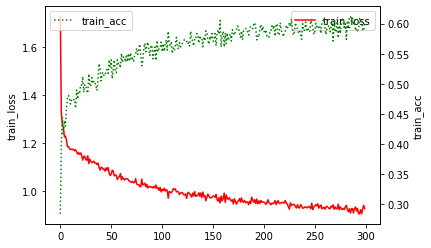

In [44]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (6,4))
ax1.plot(history.history['loss'], 'r-', label = 'train_loss')
ax1.set_ylabel('train_loss')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], 'g:', label = 'train_acc')
ax2.set_ylabel('train_acc')
ax2.legend()
plt.show()